In [1]:
pip install lxml

     |████████████████████████████████| 5.5MB 5.1MB/s eta 0:00:01     |████████████████████████████▏   | 4.9MB 5.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
#from bs4 import BeautifulSoup
import requests
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [6]:
pip install BeautifulSoup4

     |████████████████████████████████| 122kB 5.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install bs4

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [2]:
CLIENT_ID = 'KN3CVJE12QZUE3QEFYHNO4XV3ZK0CZUSUKMBRS1PL4AUJYDF' # your Foursquare ID
CLIENT_SECRET = 'CE3MQQFVEIP2B2NHH1XYIBUYEUO1FA2NLIJY0MOJ15HTMSN0' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KN3CVJE12QZUE3QEFYHNO4XV3ZK0CZUSUKMBRS1PL4AUJYDF
CLIENT_SECRET:CE3MQQFVEIP2B2NHH1XYIBUYEUO1FA2NLIJY0MOJ15HTMSN0


In [45]:
address = 'San Francisco'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude1 = location.latitude
longitude1 = location.longitude
print(latitude1, longitude1)

37.7790262 -122.4199061


In [16]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [6]:
search_query = 'Restaurant'
radius = 500
print(search_query + ' .... OK!')

Restaurant .... OK!


In [31]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format('KN3CVJE12QZUE3QEFYHNO4XV3ZK0CZUSUKMBRS1PL4AUJYDF', 'CE3MQQFVEIP2B2NHH1XYIBUYEUO1FA2NLIJY0MOJ15HTMSN0', 37.7790262, -122.4199061, 20180604, 'Restaurant', 1000, 30)
url

'https://api.foursquare.com/v2/venues/search?client_id=KN3CVJE12QZUE3QEFYHNO4XV3ZK0CZUSUKMBRS1PL4AUJYDF&client_secret=CE3MQQFVEIP2B2NHH1XYIBUYEUO1FA2NLIJY0MOJ15HTMSN0&ll=37.7790262,-122.4199061&v=20180604&query=Restaurant&radius=1000&limit=30'

In [32]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f4c40853a36067f054b2561'},
 'response': {'venues': [{'id': '5a1ffa301987ec7848143581',
    'name': 'Restaurant & Hotel Upholstery Specialist',
    'location': {'address': '120 Willow St',
     'lat': 37.783722,
     'lng': -122.419803,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.783722,
       'lng': -122.419803},
      {'label': 'entrance', 'lat': 37.783557, 'lng': -122.419771}],
     'distance': 522,
     'postalCode': '94109',
     'cc': 'US',
     'city': 'San Francisco',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['120 Willow St',
      'San Francisco, CA 94109',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1f8941735',
      'name': 'Furniture / Home Store',
      'pluralName': 'Furniture / Home Stores',
      'shortName': 'Furniture / Home',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/furniture_',
       'suffix': '.png'},
      'primary': Tr

In [12]:
import requests

In [33]:
venues = results['response']['venues']

dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.neighborhood
0,5a1ffa301987ec7848143581,Restaurant & Hotel Upholstery Specialist,"[{'id': '4bf58dd8d48988d1f8941735', 'name': 'F...",v-1598832838,False,120 Willow St,37.783722,-122.419803,"[{'label': 'display', 'lat': 37.783722, 'lng':...",522,94109,US,San Francisco,CA,United States,"[120 Willow St, San Francisco, CA 94109, Unite...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43f4dc37f964a5209f2f1fe3,Turtle Tower Restaurant,"[{'id': '4bf58dd8d48988d14a941735', 'name': 'V...",v-1598832838,False,645 Larkin St,37.783989,-122.417764,"[{'label': 'display', 'lat': 37.78398947390574...",583,94109,US,San Francisco,CA,United States,"[645 Larkin St (btwn Eddy & Ellis), San Franci...",btwn Eddy & Ellis,2180025,https://www.grubhub.com/restaurant/turtle-towe...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,94430754,NaN
2,41799f00f964a520c11d1fe3,Tú Lan Restaurant,"[{'id': '4bf58dd8d48988d14a941735', 'name': 'V...",v-1598832838,False,8 6th St,37.781987,-122.409977,"[{'label': 'display', 'lat': 37.78198675959605...",933,94103,US,San Francisco,CA,United States,"[8 6th St (btwn Market St & Stevenson St), San...",btwn Market St & Stevenson St,2054098,https://www.grubhub.com/restaurant/t-lan-8-6th...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
3,435c2400f964a5200e291fe3,Basil Thai Restaurant & Bar,"[{'id': '4bf58dd8d48988d149941735', 'name': 'T...",v-1598832838,False,1175 Folsom St,37.775388,-122.409253,"[{'label': 'display', 'lat': 37.775388, 'lng':...",1021,94103,US,San Francisco,CA,United States,"[1175 Folsom St (at Eighth), San Francisco, CA...",at Eighth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49f0fec0f964a5207b691fe3,Don Ramon's Mexican Restaurant,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1598832838,False,225 11th St,37.772882,-122.415071,"[{'label': 'display', 'lat': 37.77288193471178...",805,94103,US,San Francisco,CA,United States,"[225 11th St (between Howard & Folsom), San Fr...",between Howard & Folsom,305576,https://www.grubhub.com/restaurant/don-ramons-...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,40163600,SoMa


In [34]:
from pandas import json_normalize

In [35]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Restaurant & Hotel Upholstery Specialist,Furniture / Home Store,120 Willow St,37.783722,-122.419803,"[{'label': 'display', 'lat': 37.783722, 'lng':...",522,94109,US,San Francisco,CA,United States,"[120 Willow St, San Francisco, CA 94109, Unite...",NaN,NaN,5a1ffa301987ec7848143581
1,Turtle Tower Restaurant,Vietnamese Restaurant,645 Larkin St,37.783989,-122.417764,"[{'label': 'display', 'lat': 37.78398947390574...",583,94109,US,San Francisco,CA,United States,"[645 Larkin St (btwn Eddy & Ellis), San Franci...",btwn Eddy & Ellis,NaN,43f4dc37f964a5209f2f1fe3
2,Tú Lan Restaurant,Vietnamese Restaurant,8 6th St,37.781987,-122.409977,"[{'label': 'display', 'lat': 37.78198675959605...",933,94103,US,San Francisco,CA,United States,"[8 6th St (btwn Market St & Stevenson St), San...",btwn Market St & Stevenson St,NaN,41799f00f964a520c11d1fe3
3,Basil Thai Restaurant & Bar,Thai Restaurant,1175 Folsom St,37.775388,-122.409253,"[{'label': 'display', 'lat': 37.775388, 'lng':...",1021,94103,US,San Francisco,CA,United States,"[1175 Folsom St (at Eighth), San Francisco, CA...",at Eighth,NaN,435c2400f964a5200e291fe3
4,Don Ramon's Mexican Restaurant,Mexican Restaurant,225 11th St,37.772882,-122.415071,"[{'label': 'display', 'lat': 37.77288193471178...",805,94103,US,San Francisco,CA,United States,"[225 11th St (between Howard & Folsom), San Fr...",between Howard & Folsom,SoMa,49f0fec0f964a5207b691fe3
5,Yemeni's Restaurant,Middle Eastern Restaurant,1098 Sutter St,37.788023,-122.418336,"[{'label': 'display', 'lat': 37.78802322422273...",1011,94109,US,San Francisco,CA,United States,"[1098 Sutter St (at Larkin St), San Francisco,...",at Larkin St,NaN,4ba3db3af964a520166738e3
6,Vietnam II Restaurant,Vietnamese Restaurant,701 Larkin St,37.784260,-122.417778,NaN,611,94109,US,San Francisco,CA,United States,"[701 Larkin St (btw Ellis St & Olive St), San ...",btw Ellis St & Olive St,NaN,4430330bf964a520eb311fe3
7,Cafe Splash Restaurant,Vietnamese Restaurant,750 Ellis St,37.784405,-122.418565,"[{'label': 'display', 'lat': 37.784405, 'lng':...",610,94109,US,San Francisco,CA,United States,"[750 Ellis St (Btwn Polk and Larkin), San Fran...",Btwn Polk and Larkin,NaN,4b1aba3ff964a52070f023e3
8,Chutney Restaurant,Indian Restaurant,511 Jones St,37.786017,-122.413003,"[{'label': 'display', 'lat': 37.78601675531255...",987,94102,US,San Francisco,CA,United States,"[511 Jones St (at O'Farrell St), San Francisco...",at O'Farrell St,NaN,4ac44acdf964a520949e20e3
9,Darbar Restaurant,Indian Restaurant,1412 Polk St,37.789819,-122.420527,"[{'label': 'display', 'lat': 37.78981875679899...",1202,94109,US,San Francisco,CA,United States,"[1412 Polk St (at Pine St), San Francisco, CA ...",at Pine St,NaN,45209ad3f964a520b83a1fe3


In [36]:
dataframe_filtered.name

0            Restaurant & Hotel Upholstery Specialist
1                             Turtle Tower Restaurant
2                                   Tú Lan Restaurant
3                         Basil Thai Restaurant & Bar
4                      Don Ramon's Mexican Restaurant
5                                 Yemeni's Restaurant
6                               Vietnam II Restaurant
7                              Cafe Splash Restaurant
8                                  Chutney Restaurant
9                                   Darbar Restaurant
10                              Quintero's Restaurant
11                           Pakwan Indian Restaurant
12    Eden's Mediterranean Turkish & Greek Restaurant
13                               7 Mission Restaurant
14                                   Restaurant Depot
15                          Golden Kim Tar Restaurant
16                                Restaurant Caliente
17          The Restaurant at the End of the Universe
18                          

In [46]:
venues_map = folium.Map(location=[latitude1, longitude1], zoom_start=13) 


folium.features.CircleMarker(
    [latitude1, longitude1],
    radius=10,
    color='red',
    popup='San Francisco',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [27]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    attrs-20.1.0               |     pyh9f0ad1d_0          41 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-3.1           |   py36h45558ae

In [39]:
address = 'Austin, Texas'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

30.2711286 -97.7436995


In [40]:
search_query = 'Restaurant'
radius = 500
print(search_query + ' .... OK!')

Restaurant .... OK!


In [26]:
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format('KN3CVJE12QZUE3QEFYHNO4XV3ZK0CZUSUKMBRS1PL4AUJYDF', 'CE3MQQFVEIP2B2NHH1XYIBUYEUO1FA2NLIJY0MOJ15HTMSN0', 30.2711286, -97.7436995, 20180604, 'Restaurant', 1000, 30)
url2

'https://api.foursquare.com/v2/venues/search?client_id=KN3CVJE12QZUE3QEFYHNO4XV3ZK0CZUSUKMBRS1PL4AUJYDF&client_secret=CE3MQQFVEIP2B2NHH1XYIBUYEUO1FA2NLIJY0MOJ15HTMSN0&ll=30.2711286,-97.7436995&v=20180604&query=Restaurant&radius=1000&limit=30'

In [27]:
results2 = requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '5f4c40435ba1da6968c34cb3'},
 'response': {'venues': [{'id': '40b13b00f964a520b1f31ee3',
    'name': 'Iron Cactus Mexican Restaurant and Margarita Bar',
    'location': {'address': '606 Trinity St',
     'crossStreet': 'at E 6th St',
     'lat': 30.26734,
     'lng': -97.73941,
     'labeledLatLngs': [{'label': 'display',
       'lat': 30.26734,
       'lng': -97.73941}],
     'distance': 589,
     'postalCode': '78701',
     'cc': 'US',
     'city': 'Austin',
     'state': 'TX',
     'country': 'United States',
     'formattedAddress': ['606 Trinity St (at E 6th St)',
      'Austin, TX 78701',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1c1941735',
      'name': 'Mexican Restaurant',
      'pluralName': 'Mexican Restaurants',
      'shortName': 'Mexican',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/mexican_',
       'suffix': '.png'},
      'primary': True}],
    'delivery': {'id': '1582734',
     'ur

In [41]:
venues2 = results2['response']['venues']

dataframe2 = json_normalize(venues2)
dataframe2.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.neighborhood
0,40b13b00f964a520b1f31ee3,Iron Cactus Mexican Restaurant and Margarita Bar,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1598832796,False,606 Trinity St,at E 6th St,30.267340,-97.739410,"[{'label': 'display', 'lat': 30.26734, 'lng': ...",589,78701,US,Austin,TX,United States,"[606 Trinity St (at E 6th St), Austin, TX 7870...",1582734,https://www.grubhub.com/restaurant/iron-cactus...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
1,47e29b8af964a520454e1fe3,Champions Restaurant & Sports Bar,"[{'id': '4bf58dd8d48988d11d941735', 'name': 'S...",v-1598832796,False,300 E 4th St,at Trinity St,30.265519,-97.740274,"[{'label': 'display', 'lat': 30.2655193, 'lng'...",705,78701,US,Austin,TX,United States,"[300 E 4th St (at Trinity St), Austin, TX 7870...",NaN,NaN,NaN,NaN,NaN,NaN,33106632,NaN
2,4dadff2affcb58f1a907e1f0,Texas Restaurant Association,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",v-1598832796,False,1400 Lavaca St,NaN,30.277082,-97.742714,"[{'label': 'display', 'lat': 30.27708244323730...",669,78701,US,Austin,TX,United States,"[1400 Lavaca St, Austin, TX 78701, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4a577e5bf964a5203eb61fe3,Brick Oven Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1598832796,False,1209 Red River St,E. 12th St.,30.272700,-97.734727,"[{'label': 'display', 'lat': 30.27270027422925...",880,78701,US,Austin,TX,United States,"[1209 Red River St (E. 12th St.), Austin, TX 7...",NaN,NaN,NaN,NaN,NaN,NaN,49724895,NaN
4,568466f7498e685aff6f4be4,Restaurant Altitude,"[{'id': '5453de49498eade8af355881', 'name': 'B...",v-1598832796,False,701 Brazos St,NaN,30.268606,-97.740467,"[{'label': 'display', 'lat': 30.2686062, 'lng'...",418,78701,US,Austin,TX,United States,"[701 Brazos St, Austin, TX 78701, United States]",NaN,NaN,NaN,NaN,NaN,NaN,150256047,NaN


In [42]:
filtered_columns2 = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered2 = dataframe2.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]

dataframe_filtered2

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Iron Cactus Mexican Restaurant and Margarita Bar,Mexican Restaurant,606 Trinity St,30.267340,-97.739410,"[{'label': 'display', 'lat': 30.26734, 'lng': ...",589,78701,US,Austin,TX,United States,"[606 Trinity St (at E 6th St), Austin, TX 7870...",at E 6th St,NaN,40b13b00f964a520b1f31ee3
1,Champions Restaurant & Sports Bar,Sports Bar,300 E 4th St,30.265519,-97.740274,"[{'label': 'display', 'lat': 30.2655193, 'lng'...",705,78701,US,Austin,TX,United States,"[300 E 4th St (at Trinity St), Austin, TX 7870...",at Trinity St,NaN,47e29b8af964a520454e1fe3
2,Texas Restaurant Association,Government Building,1400 Lavaca St,30.277082,-97.742714,"[{'label': 'display', 'lat': 30.27708244323730...",669,78701,US,Austin,TX,United States,"[1400 Lavaca St, Austin, TX 78701, United States]",NaN,NaN,4dadff2affcb58f1a907e1f0
3,Brick Oven Restaurant,Italian Restaurant,1209 Red River St,30.272700,-97.734727,"[{'label': 'display', 'lat': 30.27270027422925...",880,78701,US,Austin,TX,United States,"[1209 Red River St (E. 12th St.), Austin, TX 7...",E. 12th St.,NaN,4a577e5bf964a5203eb61fe3
4,Restaurant Altitude,Business Service,701 Brazos St,30.268606,-97.740467,"[{'label': 'display', 'lat': 30.2686062, 'lng'...",418,78701,US,Austin,TX,United States,"[701 Brazos St, Austin, TX 78701, United States]",NaN,NaN,568466f7498e685aff6f4be4
5,Mai Thai Restaurant,Thai Restaurant,207 San Jacinto Blvd #201,30.264184,-97.741611,"[{'label': 'display', 'lat': 30.26418408882338...",798,78701,US,Austin,TX,United States,"[207 San Jacinto Blvd #201 (3rd Street), Austi...",3rd Street,NaN,4dd2d70acc3fc3ce876cdadf
6,Polvos Mexican Restaurant,Mexican Restaurant,NaN,30.267284,-97.750535,"[{'label': 'display', 'lat': 30.26728428900097...",784,78701,US,Austin,TX,United States,"[Austin, TX 78701, United States]",NaN,NaN,59babfea82a750065317c537
7,Caroline Restaurant,Hotel,621 Congress Ave Ste 101,30.268816,-97.742298,"[{'label': 'display', 'lat': 30.26881570226448...",290,78701,US,Austin,TX,United States,"[621 Congress Ave Ste 101 (7th St), Austin, TX...",7th St,Downtown Austin,59704c261fa7632be2cede36
8,Harbour Restaurant,Food,720 Brazos St,30.269085,-97.741234,"[{'label': 'display', 'lat': 30.26908493041992...",328,78701,US,Austin,TX,United States,"[720 Brazos St, Austin, TX 78701, United States]",NaN,NaN,4f321cd719836c91c7b729ab
9,Koriente Restaurant,Korean Restaurant,621 E 7th St,30.267108,-97.736029,"[{'label': 'display', 'lat': 30.26710786242589...",862,78701,US,Austin,TX,United States,"[621 E 7th St (at Sabine), Austin, TX 78701, U...",at Sabine,NaN,49bbf0c2f964a520fd531fe3


In [43]:
dataframe_filtered2.name

0     Iron Cactus Mexican Restaurant and Margarita Bar
1                    Champions Restaurant & Sports Bar
2                         Texas Restaurant Association
3                                Brick Oven Restaurant
4                                  Restaurant Altitude
5                                  Mai Thai Restaurant
6                            Polvos Mexican Restaurant
7                                  Caroline Restaurant
8                                   Harbour Restaurant
9                                  Koriente Restaurant
10                                    Slate Restaurant
11                             RA Sushi Bar Restaurant
12                          Crimson Restaurant and Bar
13                                  Ancho's Restaurant
14                            Teji's Indian Restaurant
15                                  Emilias Restaurant
16                        Sheraton Landmark Restaurant
17                              Gloria's Latin Cuisine
18        

In [115]:
venues_map2 = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Austin',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map2)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered2.lat, dataframe_filtered2.lng, dataframe_filtered2.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map2)

# display map
venues_map2

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [60]:
dataframe_filtered_category = dataframe_filtered.groupby('categories').agg(['count'])
dataframe_filtered_category.head()

,name,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
categories,,,,,,,,,,,,,,,
Bar,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Chinese Restaurant,3,3,3,3,3,3,3,3,3,3,3,3,2,0,3
Coffee Shop,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Food,6,6,6,6,6,6,6,6,6,6,6,6,0,0,6
Furniture / Home Store,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1


In [66]:
dataframe_filtered_category.rename(columns={"name": "Category Count"})


,Category Count,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
,count,count,count,count,count,count,count,count,count,count,count,count,count,count
categories,,,,,,,,,,,,,,
Bar,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Chinese Restaurant,3,3,3,3,3,3,3,3,3,3,3,2,0,3
Coffee Shop,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Food,6,6,6,6,6,6,6,6,6,6,6,0,0,6
Furniture / Home Store,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Indian Restaurant,3,3,3,3,3,3,3,3,3,3,3,3,0,3
Mediterranean Restaurant,1,1,1,1,1,1,1,1,1,1,1,1,0,1
Mexican Restaurant,2,2,2,2,2,2,2,2,2,2,2,2,1,2


In [85]:
del dataframe_filtered_category['distance'] #repeat for all columns


In [86]:
dataframe_filtered_category.head()

,name
,count
categories,
Bar,1
Chinese Restaurant,3
Coffee Shop,1
Food,6
Furniture / Home Store,1


In [87]:
dataframe_filtered_category.rename(columns={"name": "Category Count"})


,Category Count
,count
categories,
Bar,1
Chinese Restaurant,3
Coffee Shop,1
Food,6
Furniture / Home Store,1
Indian Restaurant,3
Mediterranean Restaurant,1
Mexican Restaurant,2


<AxesSubplot:xlabel='categories'>

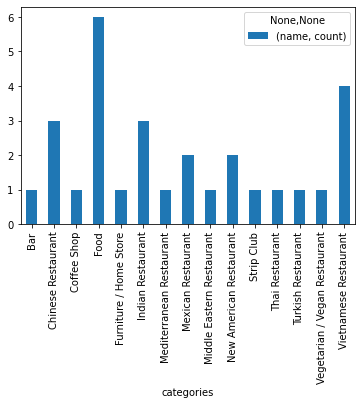

In [95]:
dataframe_filtered_category.plot.bar()

In [96]:
dataframe_filtered_category2 = dataframe_filtered2.groupby('categories').agg(['count'])
dataframe_filtered_category2.head()

,name,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
categories,,,,,,,,,,,,,,,
American Restaurant,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1
BBQ Joint,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
Business Service,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Food,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3
Government Building,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1


In [110]:
del dataframe_filtered_category2['id'] #repeat for all columns


In [112]:
dataframe_filtered_category2.rename(columns={"name": "Category Count"})


,Category Count
,count
categories,
American Restaurant,1
BBQ Joint,1
Business Service,1
Food,3
Government Building,1
Hotel,1
Indian Restaurant,1
Italian Restaurant,1


In [113]:
dataframe_filtered_category2

,name
,count
categories,
American Restaurant,1
BBQ Joint,1
Business Service,1
Food,3
Government Building,1
Hotel,1
Indian Restaurant,1
Italian Restaurant,1


<AxesSubplot:xlabel='categories'>

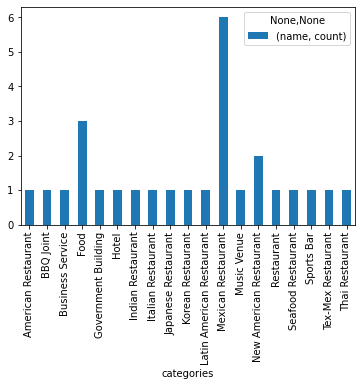

In [114]:
dataframe_filtered_category2.plot.bar()